# The Hidden Story of the Movie Industry - A Microsoft Presentation

## Investigating and Exploring the Movie Industry - Initial data exploration

Hello everyone, here we will begin our exploration into the movie industry in partnership with Microsoft Inc.

Our first actions here will be to import the packages we plan on using in this exploration.

In [1]:
# Importing necessary packages for data exploration.
# I may need to review these packages at the conclusion of our exploration in case any were not utilized.
# Will likely need to revisit formatting of packages to adhere to standards.
import pandas as pd
import os
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

Next I am going to be looking at my current directory where our files are downloaded to with the "pwd" cmd.

I am going to have to double back to make sure I hide my folder pathway here.

Above is the command I would use to locate my current directory. 
I am not uploading my individual pathway to GitHub for obvious reasons.

My next step is to Unzip files using the following command below while in your appropriate local folder location.

This command unzips all files that are zipped in that location.

My next step is to ensure that the imported files are able to be read and put into a dataframe for further exploration.

In [2]:
# opening up a dataframe that will read the csv file of bom.movie_gross.csv in the zippedData folder.
df = pd.read_csv('zippedData/bom.movie_gross.csv')
# viewing the head of the dataframe so we can see it's contents.
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Next step is getting a list of the csv files in the downloaded folder.

In [3]:
# creating a list of csv files using glob.
csv_files = glob("./zippedData/*.csv")
csv_files

['./zippedData/tmdb.movies.csv',
 './zippedData/imdb.title.crew.csv',
 './zippedData/tn.movie_budgets.csv',
 './zippedData/imdb.title.ratings.csv',
 './zippedData/imdb.name.basics.csv',
 './zippedData/imdb.title.principals.csv',
 './zippedData/imdb.title.akas.csv',
 './zippedData/bom.movie_gross.csv',
 './zippedData/imdb.title.basics.csv']

Next is checking the csv files for what type they are.

In [4]:
type(csv_files)

list

Next step is to create a dictionary of the csv files so we can pull them later on.

In [5]:
# creating a dictionary
d = {}
# pulling csv files into a dictionary with a for loop.
for file in csv_files:
    d[file] = pd.read_csv(file)
# viewing the newly created dictionary keys.
d.keys()

dict_keys(['./zippedData/tmdb.movies.csv', './zippedData/imdb.title.crew.csv', './zippedData/tn.movie_budgets.csv', './zippedData/imdb.title.ratings.csv', './zippedData/imdb.name.basics.csv', './zippedData/imdb.title.principals.csv', './zippedData/imdb.title.akas.csv', './zippedData/bom.movie_gross.csv', './zippedData/imdb.title.basics.csv'])

Next is to test to make sure that the dictionary pulls the intended information.

In [6]:
# using the dictionary and .info() funciton to ensure functionality.
d['./zippedData/imdb.title.crew.csv'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(3)
memory usage: 3.3+ MB


Next is creating a dictionary that will remove the file designations from the name when referencing the files later on.

In [7]:
# creating a dictionary
csv_files_dict = {}
# using a for loop to pull the files and clean up the name.
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_") # cleaning the filenames
    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df
# confirming dictionary keys
csv_files_dict.keys()

dict_keys(['tmdb_movies', 'imdb_title_crew', 'tn_movie_budgets', 'imdb_title_ratings', 'imdb_name_basics', 'imdb_title_principals', 'imdb_title_akas', 'bom_movie_gross', 'imdb_title_basics'])

Next we want to confirm the contents of the dictionary. 

In [8]:
# viewing info for dictionary
csv_files_dict['imdb_title_crew'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0285252 to tt9010172
Data columns (total 2 columns):
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(2)
memory usage: 3.3+ MB


Next we want to enable our SQL database and instantiate our cursor. 

In [9]:
# connecting SQL to our database
conn = sqlite3.connect("movies_db.sqlite")
# instantiating our cursor
cur = conn.cursor()

Next we are going to create our SQL table using Try and Except.

In [10]:
# defining our table using the try, except loop.
def create_sql_table_from_df(df, name, conn):
    try:
        df.to_sql(name, conn)
        print(f"Created table {name}")
    
    except Exception as e:
        print(f"could not make table {name}")
        print(e)

Next we will create a SQL table from the files in the dictionary we created earlier.

In [11]:
# creating a for loop to make our SQL table.
for name, table in csv_files_dict.items():
    create_sql_table_from_df(table, name, conn)

could not make table tmdb_movies
Table 'tmdb_movies' already exists.
could not make table imdb_title_crew
Table 'imdb_title_crew' already exists.
could not make table tn_movie_budgets
Table 'tn_movie_budgets' already exists.
could not make table imdb_title_ratings
Table 'imdb_title_ratings' already exists.
could not make table imdb_name_basics
Table 'imdb_name_basics' already exists.
could not make table imdb_title_principals
Table 'imdb_title_principals' already exists.
could not make table imdb_title_akas
Table 'imdb_title_akas' already exists.
could not make table bom_movie_gross
Table 'bom_movie_gross' already exists.
could not make table imdb_title_basics
Table 'imdb_title_basics' already exists.


If you see an out from the above line that says "table __ already exists." that is because you have likely ran the code once and the table already exists.

Next we want to pull the names of all of our SQL tables we just created.

In [12]:
# pulling a list of all the SQL table names
conn.execute("select name from sqlite_master where type='table';").fetchall()

[('tmdb_movies',),
 ('imdb_title_crew',),
 ('tn_movie_budgets',),
 ('imdb_title_ratings',),
 ('imdb_name_basics',),
 ('imdb_title_principals',),
 ('imdb_title_akas',),
 ('bom_movie_gross',),
 ('imdb_title_basics',)]

Next step will be looking into the data itself now that we have the basis of our file setup completed.

## Column Info

Here we will look into the files and data and begin familiarizing ourselves with it.

In [13]:
# Here we will print the column info for each table and seprate it for easier viewing.
for item in csv_files_dict.items():
        print("===============New DF===============")
        print(item[0])
        print(item[1].info())
        print("================End DF===============")

===============New DF===============
tmdb_movies
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB
None
================End DF===============
===============New DF===============
imdb_title_crew
<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0285252 to tt9010172
Data columns (total 2 columns):
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(2)
memory usage: 3.3+ MB
None
================End DF===============
===============New DF======

Next we will want to set up dataframes for each of the files we have.

I will need to have a function that will simplify this below

In [14]:
tmdb_movies_df = csv_files_dict['tmdb_movies']
imdb_title_crew_df =csv_files_dict['imdb_title_crew']
tn_movie_budgets_df = csv_files_dict['tn_movie_budgets']
imdb_title_ratings_df = csv_files_dict['imdb_title_ratings']
imdb_name_basics_df = csv_files_dict['imdb_name_basics']
imdb_title_principals_df = csv_files_dict['imdb_title_principals']
imdb_title_akas_df = csv_files_dict['imdb_title_akas']
bom_movie_gross_df =csv_files_dict['bom_movie_gross']
imdb_title_basics_df = csv_files_dict['imdb_title_basics']

Next we'll start viewing the tables themselves.

## View of Dataframes

Here we are going to look at each table to get a visualization of what they each hold.

In [15]:
tmdb_movies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [16]:
imdb_title_crew_df.head()

,directors,writers
tconst,,
tt0285252,nm0899854,nm0899854
tt0438973,NaN,"nm0175726,nm1802864"
tt0462036,nm1940585,nm1940585
tt0835418,nm0151540,"nm0310087,nm0841532"
tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [17]:
tn_movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [18]:
imdb_title_ratings_df.head()

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


In [19]:
imdb_name_basics_df.head()

,primary_name,birth_year,death_year,primary_profession,known_for_titles
nconst,,,,,
nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [20]:
imdb_title_principals_df.head()

,ordering,nconst,category,job,characters
tconst,,,,,
tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
tt0111414,2,nm0398271,director,NaN,NaN
tt0111414,3,nm3739909,producer,producer,NaN
tt0323808,10,nm0059247,editor,NaN,NaN
tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [21]:
imdb_title_akas_df.head()

,ordering,title,region,language,types,attributes,is_original_title
title_id,,,,,,,
tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [22]:
bom_movie_gross_df.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


In [23]:
imdb_title_basics_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


Alright so from here we can being our attempts to understand the data and formulate useful questions to answer.

# Question 1 - What measures of success can we use in the industry that are most reliable?

Based on the data available to us during our research, we found that the categories of "Rating" and "Profit" were the most used indicators of success within the industry. We set out to investigate if that was true, and if so what movies were the best examples of this.

To learn more about what makes a movie successful, we first dove into the "rating" of a movie to get view of the top rated movies. 

## Is Rating a good measure of success?

Here we are going to join the imdb_title_basics_df with the imdb_title_raings_df to get a good view of the average rating of a movie.

In [24]:
# joining tables with pandas
movie_ratings1 = imdb_title_basics_df.join([imdb_title_ratings_df])
movie_ratings1.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


Next we will sort the movies based on the top 25 highest average ratings. 

In [25]:
# Making another df that will have the values sorted by highest and limited to the top 25.
movie_ratings2 = movie_ratings1.sort_values(by='start_year', ascending=True)[:25]
movie_ratings2.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt1566491,Brainiacs in La La Land,Brainiacs in La La Land,2010,NaN,Comedy,NaN,NaN
tt2578092,Fireplace for your Home: Crackling Fireplace w...,Fireplace for your Home: Crackling Fireplace w...,2010,61.0,Music,6.9,17.0
tt1634300,Role/Play,Role/Play,2010,85.0,"Drama,Romance",5.0,894.0
tt1634332,Johan1,Johan Primero,2010,78.0,"Comedy,Drama,Romance",7.1,124.0
tt1634334,Hands Up,Les mains en l'air,2010,90.0,Drama,6.2,271.0


Here we will want to group the average ratings by year since I have the assumption that the average ratings will increase with year since people are voting online and in polls more often now then in years past and I believe that will skew the results for average rating to be non-representative of the movies actual success.

In [26]:
# grouping results into years and gathering the mean of each year's data points.
movie_ratings1.groupby('start_year', as_index=False).mean()

,start_year,runtime_minutes,averagerating,numvotes
0,2010,85.495694,6.259585,4488.480418
1,2011,86.410106,6.290134,4431.113953
2,2012,89.208856,6.297057,4261.238932
3,2013,84.931670,6.287259,4460.397622
4,2014,84.541500,6.319806,4107.310238
5,2015,85.407108,6.265894,3080.688721
6,2016,84.974249,6.347300,3052.597523
7,2017,85.732214,6.397624,2513.674280
8,2018,87.661099,6.415599,2193.447914
9,2019,90.887358,6.703578,1408.505046


Here we are going to drop our Null values

In [27]:
# using the drop function.
movie_ratings1.dropna(inplace = True)

Re-calculating the groupby ratings after drop.

In [28]:
movie_ratings3 = movie_ratings1.groupby('start_year', as_index=False).mean()
movie_ratings3

,start_year,runtime_minutes,averagerating,numvotes
0,2010,92.603014,6.267108,5043.330407
1,2011,94.337817,6.290523,4999.282024
2,2012,99.452374,6.291509,4761.220652
3,2013,92.516630,6.292406,4933.784507
4,2014,93.444872,6.321108,4562.855340
5,2015,93.491111,6.265817,3415.804183
6,2016,93.784971,6.328285,3414.603597
7,2017,94.849572,6.363825,2832.789971
8,2018,97.005933,6.375993,2505.006998
9,2019,100.124723,6.653492,1696.149113


Plotting the results that we discovered on a bar plot using seaborn.

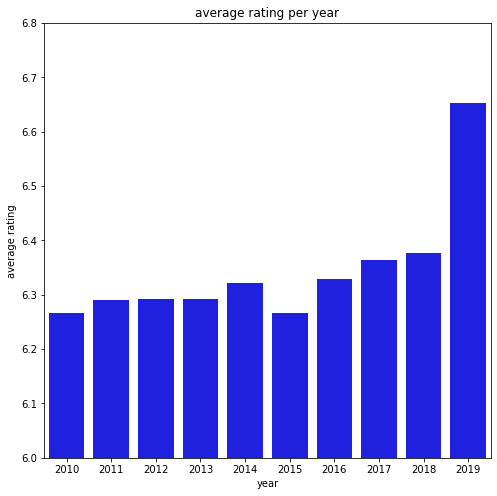

In [29]:
# using seaborn to create a bar plot using the start_year and averagerating, then displaying it.
plt.figure(figsize=(8, 8))
sns.barplot(x="start_year", y="averagerating", data=movie_ratings3, color="blue")
plt.title("average rating per year")
plt.ylim(6, 6.8)
plt.xlabel("year")
plt.ylabel("average rating")
plt.show()

Its clear that since average rating is on average increasing each year, that the ratings of a movie do not accurately reflect the success of a movie and are skewed by the age of the movie itself. 
From now on we will ignore rating as a measure of success for the industry.

# Question 2 - What month of release has the best profit margins?

## Looking into Profit

Next we believe that the profit that a movie makes is our best indicator of success in the industry. We'll start exploring that below.

Here we are going to use SQL to return our table names we worked to create earlier.

In [30]:
def get_table_list(conn):
    query = "select name from sqlite_master where type='table';"
    table_names = [r[0] for r in conn.execute(query).fetchall()]
    return table_names

Next we will display the tables names in a list.

In [31]:
table_names = get_table_list(conn)
table_names

['tmdb_movies',
 'imdb_title_crew',
 'tn_movie_budgets',
 'imdb_title_ratings',
 'imdb_name_basics',
 'imdb_title_principals',
 'imdb_title_akas',
 'bom_movie_gross',
 'imdb_title_basics']

From here we will look to Join the tn_movie_budgets and imdb_title_basics tables.

In [32]:
# Here we will use a query to perform a left join on movie and primary_title.
query = """SELECT xx.*, yy.genres
           FROM tn_movie_budgets as xx
           LEFT JOIN imdb_title_basics as yy
           ON xx.movie = yy.primary_title"""
# Then we are going to create a dataframe to view the subsquent results.
budget_and_title_joined_df = pd.read_sql(query, conn)
# Then we will print the shape of the dataframe and display the head.
print(budget_and_title_joined_df.shape)
budget_and_title_joined_df.head(10)

(7221, 7)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875","Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350","Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963","Action,Adventure,Sci-Fi"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",None
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",None
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200","Action,Adventure,Sci-Fi"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425",None
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209","Action,Adventure,Fantasy"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923","Action,Adventure,Thriller"


Next we'll be looking to pull the "$" and spaces out of our column data.

In [33]:
budget_and_title_joined_df['domestic_gross'] = budget_and_title_joined_df['domestic_gross'].str.replace(',', '').str.replace('$', '')
budget_and_title_joined_df['production_budget'] = budget_and_title_joined_df['production_budget'].str.replace(',', '').str.replace('$', '')
budget_and_title_joined_df['worldwide_gross'] = budget_and_title_joined_df['worldwide_gross'].str.replace(',', '').str.replace('$', '')

Next we will convert the previous column type to numeric.

In [34]:
budget_and_title_joined_df['domestic_gross'] = pd.to_numeric(budget_and_title_joined_df['domestic_gross'])
budget_and_title_joined_df['production_budget'] = pd.to_numeric(budget_and_title_joined_df['production_budget'])
budget_and_title_joined_df['worldwide_gross'] = pd.to_numeric(budget_and_title_joined_df['worldwide_gross'])

Then we will create a profit column that will pull the production budget from the worldwide gross column to get us our net profit.

In [35]:
budget_and_title_joined_df['profit'] = budget_and_title_joined_df['worldwide_gross'] - budget_and_title_joined_df['production_budget']

Then we can work to create the profit margin column using our just created profit column and our production budget.

In [36]:
budget_and_title_joined_df['profit_margin'] = ((budget_and_title_joined_df['profit'] / budget_and_title_joined_df['production_budget'])*100)

And here we look to make a column for our data that is easier to comprehend quickly on a graph.

In [37]:
budget_and_title_joined_df['profit_in_billions'] = budget_and_title_joined_df['profit']*(.000000001)

In [38]:
budget_and_title_joined_df.head(50)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres,profit,profit_margin,profit_in_billions
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,Horror,2351345279,553.257713,2.351345
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"Action,Adventure,Fantasy",635063875,154.667286,0.635064
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,"Action,Adventure,Sci-Fi",-200237650,-57.210757,-0.200238
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,"Action,Adventure,Sci-Fi",1072413963,324.384139,1.072414
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,None,999721747,315.369636,0.999722
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,None,1747311220,571.016739,1.747311
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,"Action,Adventure,Sci-Fi",1748134200,582.711400,1.748134
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,None,663420425,221.140142,0.663420
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,"Action,Adventure,Fantasy",355945209,118.648403,0.355945
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,"Action,Adventure,Thriller",579620923,193.206974,0.579621


Here we'll sort by highest profit and put that in its own dataframe. 

In [39]:
sorted_budget_and_title_joined_df = budget_and_title_joined_df.sort_values(by='profit', ascending=False)[:25]
sorted_budget_and_title_joined_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres,profit,profit_margin,profit_in_billions
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,Horror,2351345279,553.257713,2.351345
46,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,Adventure,2008208395,1004.104198,2.008208
47,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,Family,2008208395,1004.104198,2.008208
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,"Action,Adventure,Sci-Fi",1748134200,582.711400,1.748134
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,None,1747311220,571.016739,1.747311
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,"Action,Adventure,Sci-Fi",1433854864,666.909239,1.433855
73,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,"Action,Crime,Thriller",1328722794,699.327786,1.328723
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,"Action,Adventure,Sci-Fi",1292935897,574.638176,1.292936
318,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,None,1216693157,973.354526,1.216693
45,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,"Action,Adventure,Sci-Fi",1148258224,574.129112,1.148258


Now we can create a graph of the highest profit movies from our data.
We're using the Profit in Billions column here to make the data the easiest to digest for the readers.

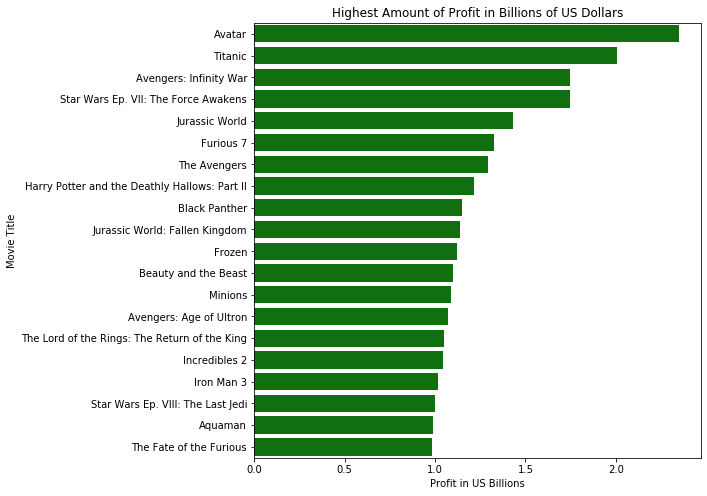

In [40]:
# Using a figure size of 8,8 for readibility.
plt.figure(figsize=(8, 8))
# Utilizing a bar plot here for simplicity.
sns.barplot(y='movie', x='profit_in_billions', data=sorted_budget_and_title_joined_df, color='green')
plt.title('Highest Amount of Profit in Billions of US Dollars')
plt.xlabel('Profit in US Billions')
plt.ylabel('Movie Title')
plt.show()

Here we can start working on creating a dataframe to use in the graph of highest profit margin movies in our data.

In [41]:
sorted_budget_and_title_joined_df2 = budget_and_title_joined_df.sort_values(by='profit_margin', ascending=False)[:25]
sorted_budget_and_title_joined_df2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres,profit,profit_margin,profit_in_billions
7179,46,"Jun 30, 1972",Deep Throat,25000,45000000,45000000,None,44975000,179900.000000,0.044975
7023,14,"Mar 21, 1980",Mad Max,200000,8750000,99750000,None,99550000,49775.000000,0.099550
6872,93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,None,193733034,43051.785333,0.193733
7102,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,"Horror,Mystery,Thriller",41556474,41556.474000,0.041556
6731,7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,None,247700000,41283.333333,0.247700
7141,10,"May 7, 2004",Super Size Me,65000,11529368,22233808,None,22168808,34105.858462,0.022169
6648,47,"Aug 13, 1942",Bambi,858000,102797000,268000000,"Biography,Documentary",267142000,31135.431235,0.267142
7212,74,"Feb 26, 1993",El Mariachi,7000,2040920,2041928,None,2034928,29070.400000,0.002035
7099,77,"Oct 1, 1968",Night of the Living Dead,114000,12087064,30087064,Horror,29973064,26292.161404,0.029973
6493,11,"Nov 21, 1976",Rocky,1000000,117235147,225000000,"Action,Comedy,Drama",224000000,22400.000000,0.224000


Here we will graph the movies with the highest profit margins from our data. 

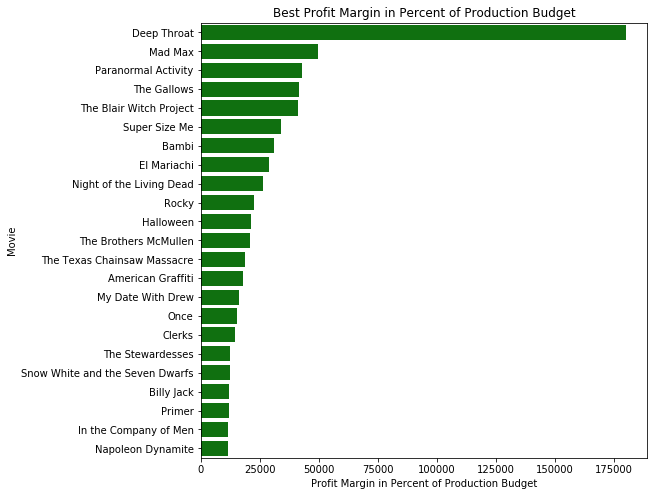

In [42]:
# Using 8,8 size for readibility of the graph.
plt.figure(figsize=(8, 8))
sns.barplot(y="movie", x="profit_margin", data=sorted_budget_and_title_joined_df2, color="green")
plt.title("Best Profit Margin in Percent of Production Budget")
plt.xlabel("Profit Margin in Percent of Production Budget")
plt.ylabel("Movie")
plt.show()

Here we can see that "Deep Throat" is a pretty big leader in terms of profit margin, but we can see a pretty good idea here of the most profitable (in terms of margin) movies in the industry and we can start utilizing this data to discover some further insights from this.

## Impact of the Month of Release of a Movie.

Here we want to take a look into what months of the year are best to release a movie in when it comes to profit margin. This is one of the factors that is easiest to adjust for a movie studio in planning for a movie and if any trends arise here we will definitely want to take advantage of that.

In [43]:
# Here we're going to take our past profit dataframe and create a new title called "new_date" that will have the dates converted to a data time format.
sorted_budget_and_title_joined_df2['new_date'] = pd.to_datetime(sorted_budget_and_title_joined_df2['release_date'])
sorted_budget_and_title_joined_df2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres,profit,profit_margin,profit_in_billions,new_date
7179,46,"Jun 30, 1972",Deep Throat,25000,45000000,45000000,None,44975000,179900.000000,0.044975,1972-06-30
7023,14,"Mar 21, 1980",Mad Max,200000,8750000,99750000,None,99550000,49775.000000,0.099550,1980-03-21
6872,93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,None,193733034,43051.785333,0.193733,2009-09-25
7102,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,"Horror,Mystery,Thriller",41556474,41556.474000,0.041556,2015-07-10
6731,7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,None,247700000,41283.333333,0.247700,1999-07-14


Next we're going to seprate each part of the new_date column so we can analyze day, month, and year seprately.

In [44]:
# Creating the new columns from the new_date column.
sorted_budget_and_title_joined_df2['new_date_year'] = pd.DatetimeIndex(sorted_budget_and_title_joined_df2['new_date']).year
sorted_budget_and_title_joined_df2['new_date_month'] = pd.DatetimeIndex(sorted_budget_and_title_joined_df2['new_date']).month
sorted_budget_and_title_joined_df2['new_date_day'] = pd.DatetimeIndex(sorted_budget_and_title_joined_df2['new_date']).day
sorted_budget_and_title_joined_df2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres,profit,profit_margin,profit_in_billions,new_date,new_date_year,new_date_month,new_date_day
7179,46,"Jun 30, 1972",Deep Throat,25000,45000000,45000000,None,44975000,179900.000000,0.044975,1972-06-30,1972,6,30
7023,14,"Mar 21, 1980",Mad Max,200000,8750000,99750000,None,99550000,49775.000000,0.099550,1980-03-21,1980,3,21
6872,93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,None,193733034,43051.785333,0.193733,2009-09-25,2009,9,25
7102,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,"Horror,Mystery,Thriller",41556474,41556.474000,0.041556,2015-07-10,2015,7,10
6731,7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,None,247700000,41283.333333,0.247700,1999-07-14,1999,7,14


Here we're just going to create a cleaner dataframe name and view it.

In [45]:
date_df = sorted_budget_and_title_joined_df2
date_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres,profit,profit_margin,profit_in_billions,new_date,new_date_year,new_date_month,new_date_day
7179,46,"Jun 30, 1972",Deep Throat,25000,45000000,45000000,None,44975000,179900.000000,0.044975,1972-06-30,1972,6,30
7023,14,"Mar 21, 1980",Mad Max,200000,8750000,99750000,None,99550000,49775.000000,0.099550,1980-03-21,1980,3,21
6872,93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,None,193733034,43051.785333,0.193733,2009-09-25,2009,9,25
7102,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,"Horror,Mystery,Thriller",41556474,41556.474000,0.041556,2015-07-10,2015,7,10
6731,7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,None,247700000,41283.333333,0.247700,1999-07-14,1999,7,14


Here we will look into creating a dataframe that will sort by the month of release and pull an average of each of the columns to compare.

In [46]:
# Using the groupby function to sort all our data into months and pull the mean for each month into one dataframe.
date_df2 = date_df.groupby('new_date_month', as_index=False).mean()
date_df2

,new_date_month,id,production_budget,domestic_gross,worldwide_gross,profit,profit_margin,profit_in_billions,new_date_year,new_date_day
0,1,58.000000,800000.0,98000000.0,9.800000e+07,9.720000e+07,12150.000000,0.097200,1971.000000,1.000000
1,2,74.000000,7000.0,2040920.0,2.041928e+06,2.034928e+06,29070.400000,0.002035,1993.000000,26.000000
2,3,14.000000,200000.0,8750000.0,9.975000e+07,9.955000e+07,49775.000000,0.099550,1980.000000,21.000000
3,5,33.500000,107500.0,10487612.5,2.277872e+07,2.267122e+07,24777.472897,0.022671,2005.500000,11.500000
4,6,27.000000,212500.0,44770478.0,4.556136e+07,4.534886e+07,95665.339125,0.045349,1988.000000,20.500000
5,7,33.333333,300000.0,58934503.0,1.049855e+08,1.046855e+08,31746.602444,0.104685,1994.333333,16.333333
6,8,53.000000,342220.0,46257641.6,8.429824e+07,8.395602e+07,19519.875596,0.083956,1982.400000,7.800000
7,9,93.000000,450000.0,107918810.0,1.941830e+08,1.937330e+08,43051.785333,0.193733,2009.000000,25.000000
8,10,59.600000,122600.0,17831538.2,2.627913e+07,2.615653e+07,18572.312382,0.026157,1983.600000,12.600000
9,11,11.000000,1000000.0,117235147.0,2.250000e+08,2.240000e+08,22400.000000,0.224000,1976.000000,21.000000


Now we can create a graph to display the profit margin differences within each month.

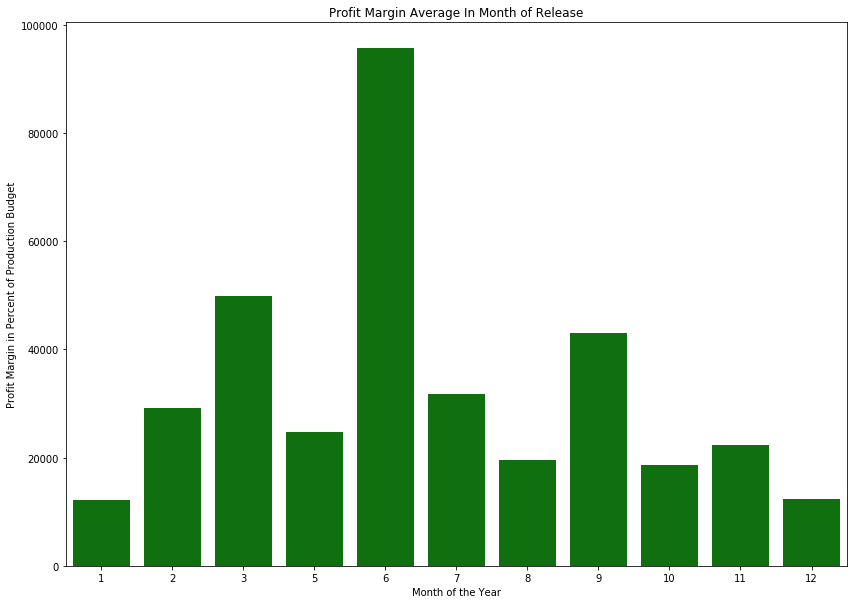

In [47]:
# Using a 14,10 figure size for readibility. 
plt.figure(figsize=(14, 10))
sns.barplot(x="new_date_month", y="profit_margin", data=date_df2, color="green")
plt.title("Profit Margin Average In Month of Release")
plt.ylabel("Profit Margin in Percent of Production Budget")
plt.xlabel("Month of the Year")
plt.show()

Here it's pretty clear to see that May is the month of the year that profit margin is the highest. This is a pretty easy thing to plan for any studio before beginning work and should definitely help to avoid releasing a movie that has a low profit margin.

# Question 3 - What day of the week is best to release on for the highest profit margins?

Here we wanted to investigate the individual day of the week of a movie release. Like our data above we can assume there will likely be at least one most profitable day of the week to release a movie on, and again this is something that is easily planed for before a movie has begun filming. 

First we will create a new column on our previous dataframe that will look for the new_date column and apply a lambda function that will give us the specific day of the week that the movie was released on. 

In [48]:
# Adding the new dayofweek column to our dataframe.
date_df['dayofweek'] = date_df['new_date'].apply(lambda x: x.strftime('%A'))
date_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres,profit,profit_margin,profit_in_billions,new_date,new_date_year,new_date_month,new_date_day,dayofweek
7179,46,"Jun 30, 1972",Deep Throat,25000,45000000,45000000,None,44975000,179900.000000,0.044975,1972-06-30,1972,6,30,Friday
7023,14,"Mar 21, 1980",Mad Max,200000,8750000,99750000,None,99550000,49775.000000,0.099550,1980-03-21,1980,3,21,Friday
6872,93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,None,193733034,43051.785333,0.193733,2009-09-25,2009,9,25,Friday
7102,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,"Horror,Mystery,Thriller",41556474,41556.474000,0.041556,2015-07-10,2015,7,10,Friday
6731,7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,None,247700000,41283.333333,0.247700,1999-07-14,1999,7,14,Wednesday


Here we will be utilizing the groupby method to pull the averages of each of our columns to see if we can gain any insights.

In [49]:
date_df3 = date_df.groupby('dayofweek', as_index=False).mean()
date_df3

,dayofweek,id,production_budget,domestic_gross,worldwide_gross,profit,profit_margin,profit_in_billions,new_date_year,new_date_month,new_date_day
0,Friday,51.230769,186161.538462,2.954664e+07,4.649746e+07,4.631130e+07,36310.841587,0.046311,1992.076923,6.307692,14.461538
1,Saturday,73.000000,777000.000000,1.150000e+08,1.400000e+08,1.392230e+08,17918.018018,0.139223,1973.000000,8.000000,11.000000
2,Sunday,11.000000,1000000.000000,1.172351e+08,2.250000e+08,2.240000e+08,22400.000000,0.224000,1976.000000,11.000000,21.000000
3,Thursday,47.000000,858000.000000,1.027970e+08,2.680000e+08,2.671420e+08,31135.431235,0.267142,1942.000000,8.000000,13.000000
4,Tuesday,37.500000,853750.000000,1.072345e+08,1.174845e+08,1.166308e+08,18096.549754,0.116631,1955.000000,11.000000,15.000000
5,Wednesday,30.750000,206750.000000,4.087122e+07,7.148609e+07,7.127934e+07,22952.135944,0.071279,1998.750000,7.500000,14.500000


Finally we'll plot this data below.

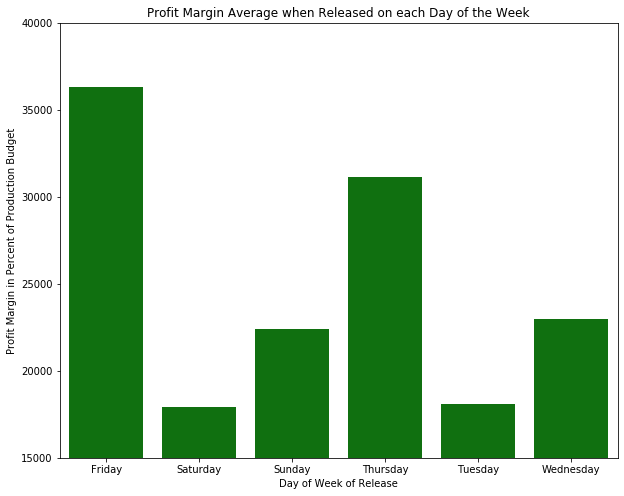

In [50]:
plt.figure(figsize=(10, 8))
sns.barplot(x="dayofweek", y="profit_margin", data=date_df3, color="green")
plt.title("Profit Margin Average when Released on each Day of the Week")
plt.ylabel("Profit Margin in Percent of Production Budget")
plt.xlabel("Day of Week of Release")
plt.ylim(15000, 40000)
plt.show()

So here we can see that Friday is clearly has the highest profit margin of the week and we should plan the release for a new movie to be on Friday, or at the next best day Thursday if Friday wasn't achievable for whatever reason. 

# Summary

After taking a look at the data we were able to gather on the movie industry it's clear that there are some general rules we will want to follow going forward.

1) Don't use ratings as a general indicator of success. Ratings are skewed by the age of the movie and are not truly indicative of that movie's success.

2) We should look to release a new movie in the month of June since this month has the highest profit margins of all release months. A change to release a movie on a specific date range like this can be planned for easily ahead of time by the studio.

3) We should look to release a new movie on Friday since this day of the week has much higher profit margins then any other day of the week.

## Topics for future research.

For future work we would like to look into the effect that a director's experience has on the profit margin of a movie.

Also we'd like to look into the variances of genre, say for example between when specific genres are best to release for profit and when the market would be most crowded with a similar type of movie.

We also would like to look into gathering different kinds of data (say data from in person interviews or written reviews of the movie) to gain more insights from how people feel about a movie itself.

Lastly the subjective question of "What makes a movie successful?" would be interesting to explore. 
We obviously looked into profit here as a main indicator of success, but perhaps something like creating a movie that is unique for its genre would be considered "successful", or something like a movie about a good cause, or a movie covering controversial topics.